<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Analysis - April 16, 2020

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [2]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [3]:
df.shape

(2497, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


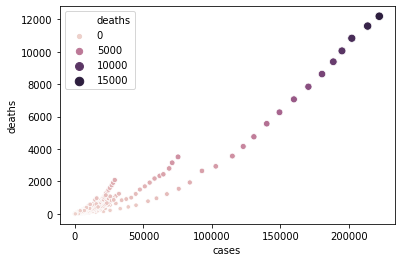

In [4]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-16', '2020-04-16', '2020-04-16', '2020-04-16',
               '2020-04-16', '2020-04-16', '2020-04-16', '2020-04-16',
               '2020-04-16', '2020-04-16'],
              dtype='datetime64[ns]', name='date', length=2497, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [6]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-17
Two days ago 2020-04-15


Display the top 10 rows of data or head(10), bottom rows is tail()

In [7]:
df.loc[daybefore:today].tail(10)

,state,fips,cases,deaths
date,,,,
2020-04-16,Tennessee,47,6090,144
2020-04-16,Texas,48,16927,431
2020-04-16,Utah,49,2683,21
2020-04-16,Vermont,50,768,35
2020-04-16,Virgin Islands,78,51,1
2020-04-16,Virginia,51,6889,208
2020-04-16,Washington,53,11152,588
2020-04-16,West Virginia,54,739,13
2020-04-16,Wisconsin,55,3875,197


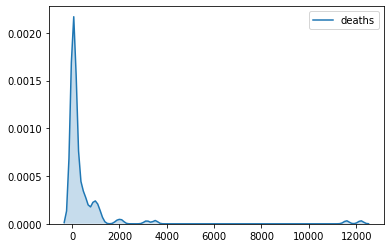

In [8]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

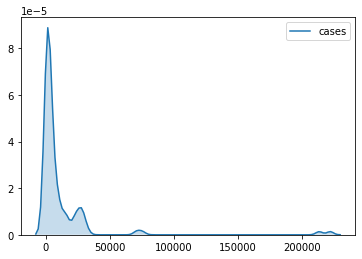

In [9]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [22]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-16,New York,36,222284,12192
2020-04-15,New York,36,213779,11586
2020-04-16,New Jersey,34,75317,3518
2020-04-15,New Jersey,34,71030,3156
2020-04-16,Michigan,26,29119,2091
2020-04-15,Michigan,26,27893,1919
2020-04-16,Massachusetts,25,32181,1245
2020-04-16,Louisiana,22,22532,1156
2020-04-15,Massachusetts,25,29918,1108


In [11]:
current_df.shape

(112, 4)

In [23]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Massachusetts',
 'Louisiana',
 'Massachusetts',
 'Louisiana']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [25]:
set(top_states_df.state.values)

{'Louisiana', 'Massachusetts', 'Michigan', 'New Jersey', 'New York'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

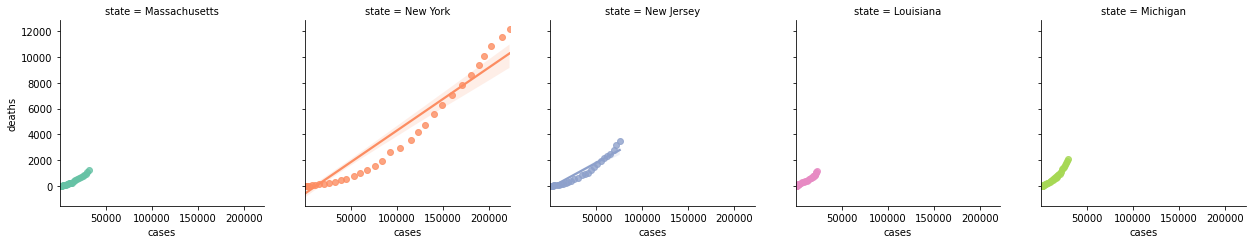

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [27]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(12)

,state,cases,deaths
date,,,
2020-04-16,New York,222284,12192
2020-04-15,New York,213779,11586
2020-04-14,New York,202208,10834
2020-04-13,New York,195031,10056
2020-04-12,New York,188694,9385
2020-04-16,New Jersey,75317,3518
2020-04-15,New Jersey,71030,3156
2020-04-14,New Jersey,68824,2805
2020-04-13,New Jersey,64584,2443


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [28]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Original Code for ICS 360 HW - Import State Level Data for Hawaii from national dataset

In [29]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
1676,2020-04-02,283,2
1731,2020-04-03,317,3
1786,2020-04-04,349,3
1841,2020-04-05,369,4
1896,2020-04-06,385,5
1951,2020-04-07,408,5
2006,2020-04-08,433,5
2062,2020-04-09,440,6
2118,2020-04-10,463,8
2174,2020-04-11,484,8


Import County Level Data for Hawaii from county dataset

In [30]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(15)

,date,county,cases,deaths
57058,2020-04-14,Hawaii,41,0
57059,2020-04-14,Honolulu,358,6
57060,2020-04-14,Kauai,21,0
57061,2020-04-14,Maui,88,3
57062,2020-04-14,Unknown,3,0
59765,2020-04-15,Hawaii,41,0
59766,2020-04-15,Honolulu,369,6
59767,2020-04-15,Kauai,21,0
59768,2020-04-15,Maui,92,3
59769,2020-04-15,Unknown,1,0


In [31]:
df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

In [32]:
df.shape

(165, 4)

Create a data frame for Maui County and display data for past 15 days

In [33]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(15)

,date,county,cases,deaths
26669,2020-04-02,Maui,27,0
28971,2020-04-03,Maui,36,0
31334,2020-04-04,Maui,38,0
33742,2020-04-05,Maui,43,0
36196,2020-04-06,Maui,44,1
38688,2020-04-07,Maui,48,1
41230,2020-04-08,Maui,54,1
43796,2020-04-09,Maui,57,2
46395,2020-04-10,Maui,66,3
49026,2020-04-11,Maui,80,3


Visualization of Cases on Maui County over time

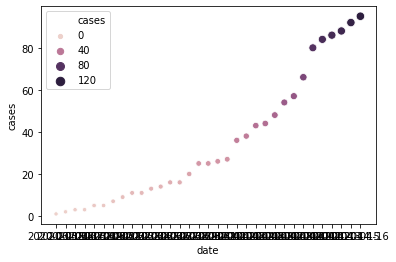

In [34]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Maui_County_df)

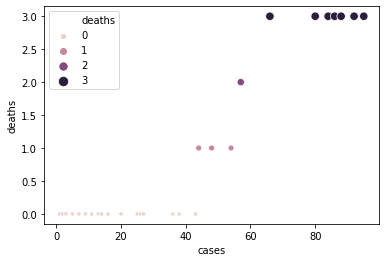

In [35]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

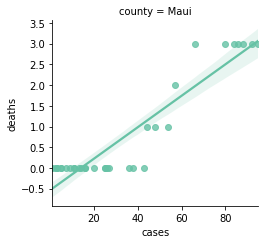

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [37]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

,date,county,cases,deaths
26667,2020-04-02,Honolulu,206,2
28969,2020-04-03,Honolulu,237,2
31332,2020-04-04,Honolulu,266,2
33740,2020-04-05,Honolulu,281,2
36194,2020-04-06,Honolulu,292,4
38686,2020-04-07,Honolulu,312,4
41228,2020-04-08,Honolulu,328,4
43794,2020-04-09,Honolulu,334,4
46393,2020-04-10,Honolulu,343,5
49024,2020-04-11,Honolulu,348,5


Visualization of Cases on Honolulu County over time

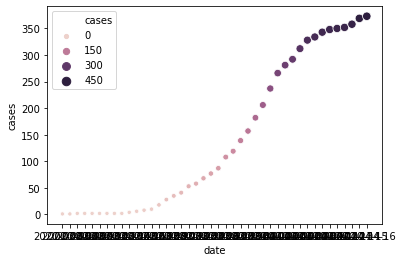

In [38]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Honolulu_County_df)

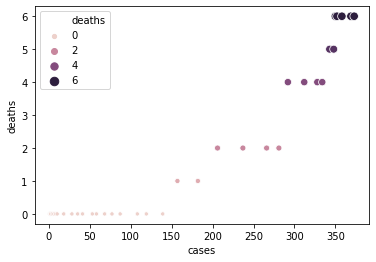

In [39]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

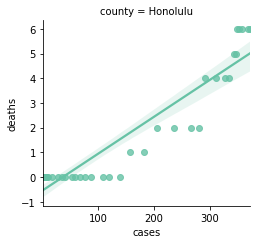

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

Analysis of Kauai County

In [41]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail()

,date,county,cases,deaths
51686,2020-04-12,Kauai,21,0
54367,2020-04-13,Kauai,21,0
57060,2020-04-14,Kauai,21,0
59767,2020-04-15,Kauai,21,0
62491,2020-04-16,Kauai,21,0


Visualization of cases at Kauai County over time

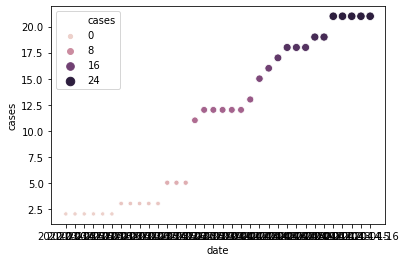

In [43]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Kauai_County_df)